## Module 2:  

## Team Members:
Porter Jurica, William Collins
## Project Title:
Qualitative Analysis of Pulmonary Fibrosis Progression



## Project Goal:
This project seeks to answer the following questions:
- How does the extent of fibrosis vary throughout the depth of fibrotic lung?
- Using interpolation, can one produce the amount of fibrosis at a specific depth into the lung?

## Disease Background: 


Prevalence & incidence
- The prevalence of pulmonary fibrotic disease is approximately 13 to 20 per 100,000 people worldwide, and global incidence is approximately 5.8 new cases per 100,000 people per year.

https://medlineplus.gov/genetics/condition/idiopathic-pulmonary-fibrosis/#frequency

https://pubmed.ncbi.nlm.nih.gov/40775309/

Risk factors (genetic, lifestyle)
- Some risk factors for pulmonary fibrosis include previous autoimmune diseases like rheumatoid arthritis, some viral infections that can cause abnormal lung scarring, exposure to hazardous materials like asbestos, coal, and mold, as well as radiation treatments and regular smoking. Additionally, genetics sometimes plays a role, as there are certain genes that can increase disease risk.

https://www.lung.org/lung-health-diseases/lung-disease-lookup/pulmonary-fibrosis/introduction/types-causes-and-risk-factors

Symptoms
- Symptoms of pulmonary fibrosis are shortness of breath, dry and persistent cough, excessive fatigue, unintended weight loss, aching muscles and joints, and occasionally "clubbing" of fingertips.

https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690
https://www.pulmonaryfibrosis.org/understanding-pff/about-pulmonary-fibrosis/symptoms

Standard of care treatment(s)
- Anti-fibrotic medications, such as Pirfenidone and Nintedanib, can help reduce the rate at which scar tissue is built up in the lungs of IPF patients. Other treatment options often include supplemental oxygen and pulmonary rehabilitation. While the aforementioned treatments can slow the progression of IPF or help patients manage their symptoms, the only cure for this disease is a lung transplantation.

https://www.pulmonaryfibrosis.org/understanding-pff/types-of-pulmonary-fibrosis/idiopathic-pulmonary-fibrosis?gad_source=1&gad_campaignid=22904172383&gbraid=0AAAAADtp88RB8DdlecgdRUKVjxWujitDP&gclid=Cj0KCQjwjL3HBhCgARIsAPUg7a5PG-Zo-d8S7m3FqG1Upc-uAvUvE8KVoL2fEBxCgGtxT7jgL9CngPUaAv9qEALw_wcB

Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
- IPF occurs when scar tissue accumulates in excess in/on alveoli. This stiffens the lungs, making it more difficult to take in oxygen. Damaged Type II alveolar cells can release profibrotic signals (such as TGF-beta), which activate fibroblasts and myofibrobalsts that alter tissue structure and produce collagen. This disrupts normal gas exchange and reduces compliance, progressively destroying alveolar structure. 

https://pmc.ncbi.nlm.nih.gov/articles/PMC9952569/

## Data-Set: 
Unpublished data was collected by the Peirce-Cottler Lab (Dept. of Biomedical Engineering) and Kim Lab (Division of Pulmonary and Critical Care) at the University of Virginia School of Medicine. 

The dataset consists of recently generated experimental measurements that examine pulmonary function and structure at both the cellular and tissue levels. These data were obtained to increase understanding of how inflammatory processes contribute to lung disease/injury under different physiological conditions.

Data Collection & Techniques:
- Data were collected using imaging techniques.
    - Lung tissues were analyzed through immunohistochemistry and immunofluoresence to help identify protein makrers and cell types. 
    - Vessel diamter, cell density, and intensity of fluoresence were measured from confocal microscopy images with the utlization of ImageJ. These quantitative measurements were expressed in micrometers, cells per area, and arbitrary fluorescence units, respectively.
    - Black and white images of lung tissue were provided in the dataset. White pixels represent markings of fibrosis whereas black pixels represent healthy lung tissue.
- Molecular assays were also used (when applicable) to assess gene and protein expression levels, and were reported as fold-change or pg/mL.

## Data Analyis: 

The Python code below analyzed provided confocal microscopy images of fibrotic lung tisue to determine the extent of fibrosis at varying depths. The code calculated the percentage of white pixels (representing fibrotic tissue) per image, which were compiled into a CSV file along with the given depths associated with each image. These values were then plotted to visualize the relationship between depth and extent of fibrosis. Finally, we applied interpolation functions to estimate fibrosis levels at depths that were not measured directly in order to output a continuous model of the progression of fibrosis throughout the lung.

In [1]:
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010017.jpg",
    r"/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010018.jpg",
    r"/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010019.jpg",
    r"/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010021.jpg",
    r"/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010022.jpg",
    r"/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010023.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    45,
    60,
    80,
    570,
    955,
    2800
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()


Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 33746
Black pixels in image 1: 4160558

White pixels in image 2: 31331
Black pixels in image 2: 4162973

White pixels in image 3: 23900
Black pixels in image 3: 4170404

White pixels in image 4: 33151
Black pixels in image 4: 4161153

White pixels in image 5: 37508
Black pixels in image 5: 4156796

Percent white px:
/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010018.jpg:
0.8045673370361328% White | Depth: 60 microns

/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010019.jpg:
0.7469892501831055% White | Depth: 80 microns

/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658 Llobe ch010021.jpg:
0.5698204040527344% White | Depth: 570 microns

/Users/porterjurica/Desktop/BME 2315/Module 2/MASK_SK658

CSV file 'Percent_White_Pixels.csv' has been created.
The interpolated point is at the x-coordinate 780.0 and y-coordinate 0.7087441580321191.


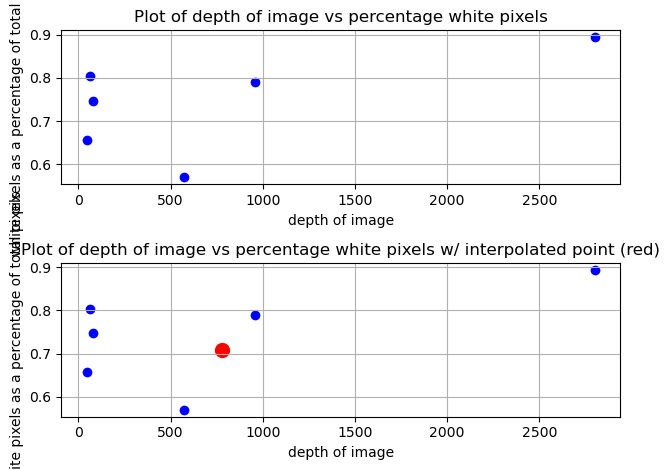

In [2]:
# Create a DataFrame that includes the filenames, depths, and percentage of white pixels

df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

#%% Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='quadratic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Verify and validate your analysis: 
Our findings align with current pulmonary fibrosis reseach demonstrating that as the biopsy depths increase, so does the percentage of white pixels (representing fibrotic tissue). This observed correlation between depth and white pixel density supports commonly accepted models that repeated epithelial injury and build-up of myofibroblasts lead to a higher accumulation of collagen and associated lung tinssue stiffening at greater depths into the lung.

Related publications:
- https://www.atsjournals.org/doi/full/10.1513/AnnalsATS.201605-341AW
- https://www.atsjournals.org/doi/full/10.1513/AnnalsATS.201806-424OC

Overall, our findings confirm established patterns and support ongoing research efforts to model fibrosis progression. The 2019 study from AnnalsATS demonstrates that changes to airway structures (such as increased wall thickness from scar tissue build-up) correlate with IPF, supporting our conclusion that fibrosis intensifies in deeper and more structurally compromised regions of the lung. In a similar sense, the 2016 AnnalsATS article brings to light the underlying biological and physiological processes of how and why the build-up occurs: repeated injury to the epithelium resulting in structural change and stiffer lungs. This observation aligns with our data showing a greater white pixel percentage in fibrotic areas.

## Conclusions and Ethical Implications: 
Based on our results and validation with current research, we can conclude that there is a clear relationship between biopsy depth and evidence of fibrotic tissue. This indicates that severity of idiopathic pulmonary fibrosis can be approximated through analysis of percentages of fibrotic tissue because the quality is depth-dependent. Using interpolation on the measured mice lung biopsy data, estimation of fibrosis is possible at intermediate lung depths. This method is useful in order to build a continuous model for estimation from a small sample of biopsies. Additionally, this method could be useful in order to limit the need for extensive lung biopsies. However, verifying these estimates require additional validation and cannot necessarily be claimed to be fully accurate. From an ethical standpoint, it is important to acknowledge that reliance on these results on their own could lead to inaccurate disease characterization and subsequently, improper treatment. Additionally, when communicating these findings, transparency is key as it must be acknowledged that the model utilized is not entirely validated and estimations are in fact, estimations. If communicated incorrectly, results can both over and underestimate necessary treatments of the disease.

## Limitations and Future Work: 
Limitations:
- Small dataset (only 6 images) limited generalizability.
- Conclusions are drawn solely from research conducted on mice. Therefore, results are likely to vary when conducted on humans. 

Future Work:
- In the future, we could use the full amount of provided images -- ideally more than that. This would allow for broader representation and more accurate results.
- Future models for estimation might also benefit from a more in-depth model selection using machine learing. This would involve analyzing bias and variance trade-offs in order to determine the most accurate order for polynomial regression in order to achieve the best fit for the provided data.
- We could also integrate molecular data to help link strucutral changes, or explore 3-D reconstructions to better visualize a more accurate model and the effects of fibrosis in the lungs.

## NOTES FROM YOUR TEAM: 
10/2:
- Assigned to new teams for Module 2
- Downloaded main_example.py, 6 random lobe images (provided from dataset), and installed needed modules & libraries

10/7:
- Having tons of trouble with Python and VSCode for some reason - reaching out to IT help desk & department for assistance
- Downloaded interpolation_example.py
- Largely worked on Disease Background, Data Set, and Data Analysis

10/9 (before class):
- Fixed Python and VSCode issues (changed computers from Mac to Dell)
- Successfully created csv file required for Module 2

10/9 (during/after class):
- Created interpolation graphs (both linear and quantitative) for our images/data.
- Started work on remaining sections.

10/16:
- Finalized project

## QUESTIONS FOR YOUR TA: 
- No questions for TA, but have regularly attended office hours and asked for assitance when needed.